# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - Group Assignment #1

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Recruitment Analysis 
### Introduction
We have a dataset collating details of applicants to 4 different companies. The dataset contains details like age, gender, nationality ** TODO ** etc. 

In this assignment we are trying to analyse the dataset and find the impact of gender age nationality previous experiences etc in getting selected for the role. The steps in doing it are divided into 3 parts

- Cleansing the data
- Extracting and exploring various subsets of data.
- Arrive at any possible conclusions or insights using the analysed information in step 2.

### Cleaning and modifying the data

#### Reading the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file = "recruitment_dataset.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 4000


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [3]:
df = df_unfiltered.dropna(axis=0, how='any')
print("Total number of datapoints(rows)", len(df))

Total number of datapoints(rows) 4000


We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

### Analysing the data
The name of the companies are not revealed and the companies are masked under names A, B, C and D. In this step we try to figure out possible bias in the following verticals grouped by the different companies. 
- Gender
- Nationality
- Age

> As a first step we need to split the data based on company.

In [4]:
df_a = df[df['company'] == 'A']
df_b = df[df['company'] == 'B']
df_c = df[df['company'] == 'C']
df_d = df[df['company'] == 'D']

print('Datapoints for company A', len(df_a))
print('Datapoints for company B', len(df_b))
print('Datapoints for company C', len(df_b))
print('Datapoints for company D', len(df_d))

Datapoints for company A 1000
Datapoints for company B 1000
Datapoints for company C 1000
Datapoints for company D 1000


Now the dataset is neatly split into 4 groups


In [5]:
decision_a = df_a.groupby('decision').size()
decision_b = df_b.groupby('decision').size()
decision_c = df_c.groupby('decision').size()
decision_d = df_d.groupby('decision').size()

> Using matplot lib to change it into pie diagram

##### Defining a function to plot pie diagram from a dataframe

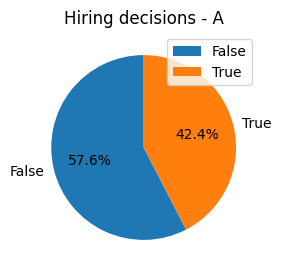

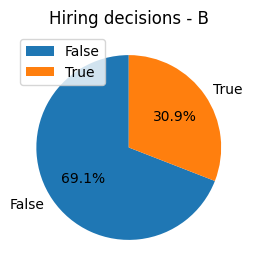

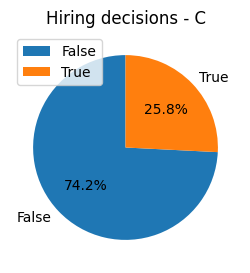

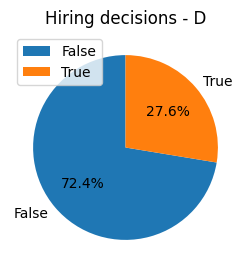

In [6]:
def plotPieChart(dataframe, title, yLabel, arg_subPlots=False):
    _, ax = plt.subplots(figsize=(3,3))  # Set the figure size using subplots
    dataframe.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, legend=True)
    ax.set_title(title)
    ax.set_ylabel(yLabel)  # Remove y-label
    plt.show()
    return

plotPieChart(decision_a, 'Hiring decisions - A', '')
plotPieChart(decision_b, 'Hiring decisions - B', '')
plotPieChart(decision_c, 'Hiring decisions - C', '')
plotPieChart(decision_d, 'Hiring decisions - D', '')


### Hiring decision analysis based on Age

 

In [29]:
from tabulate import tabulate

# mode doesn't return as a dataframe in panda so we convert it into one
def calculate_mode(df):
    return df.mode()[0] if not df.mode().empty else None

# to aggregate mean mode and median into a single table we can use agg function in panda. 
# In order to round the float mean value into two decimal places we use round function
def aggregate_analysis(df, group_by_column_name, value_column_name):
    return df.groupby(group_by_column)[value_column_name].agg(
        Mean=lambda x: round(x.mean(), 2), 
        Median='median', 
        Mode=calculate_mode,
        Variance=lambda x: round(x.var(), 2),
        SD=lambda x:round(x.std(),2),
        Q1=lambda x:round(x.quantile(0.25), 2),
        Q2=lambda x:round(x.quantile(0.5), 2),
        Q3=lambda x:round(x.quantile(0.75), 2),
        Q4=lambda x:round(x.quantile(1.00),2)
        ).reset_index()


def print_using_tabulate(df, header_list):
    print(tabulate(df, headers=header_list, tablefmt='pretty', showindex=False))

group_by_column = 'decision'
value_column = 'age'
agg_a = aggregate_analysis(df_a, group_by_column, value_column)
agg_b = aggregate_analysis(df_b, group_by_column, value_column)
agg_c = aggregate_analysis(df_c, group_by_column, value_column)
agg_d = aggregate_analysis(df_d, group_by_column, value_column)

print_using_tabulate(agg_a, ['A - Hiring | Age', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_b, ['B - Hiring | Age', 'Mean', 'Median', 'Mode','Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_c, ['C - Hiring | Age', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_d, ['D - Hiring | Age', 'Mean', 'Median', 'Mode','Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])



+------------------+-------+--------+------+----------+------+------+------+------+------+
| A - Hiring | Age | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+------------------+-------+--------+------+----------+------+------+------+------+------+
|      False       | 25.99 |  26.0  |  27  |   7.83   | 2.8  | 24.0 | 26.0 | 28.0 | 32.0 |
|       True       | 26.34 |  26.0  |  26  |   7.03   | 2.65 | 24.0 | 26.0 | 28.0 | 32.0 |
+------------------+-------+--------+------+----------+------+------+------+------+------+
+------------------+-------+--------+------+----------+------+------+------+------+------+
| B - Hiring | Age | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+------------------+-------+--------+------+----------+------+------+------+------+------+
|      False       | 26.25 |  26.0  |  28  |   8.83   | 2.97 | 24.0 | 26.0 | 28.0 | 32.0 |
|       True       | 26.43 |  26.0  |  25  |   5.81   | 2.41 | 25.0 | 26.0 | 28.0 | 32.0 |

### Hiring Decision Analysis based on university grade

# TODO


In [30]:
group_by_column = 'decision'
value_column = 'ind-university_grade'
agg_a = aggregate_analysis(df_a, group_by_column, value_column)
agg_b = aggregate_analysis(df_b, group_by_column, value_column)
agg_c = aggregate_analysis(df_c, group_by_column, value_column)
agg_d = aggregate_analysis(df_d, group_by_column, value_column)

print_using_tabulate(agg_a, ['A - Hiring | Age', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_b, ['B - Hiring | Age', 'Mean', 'Median', 'Mode','Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_c, ['C - Hiring | Age', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_d, ['D - Hiring | Age', 'Mean', 'Median', 'Mode','Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])

+------------------+-------+--------+------+----------+------+------+------+------+------+
| A - Hiring | Age | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+------------------+-------+--------+------+----------+------+------+------+------+------+
|      False       | 61.67 |  62.0  |  65  |  39.42   | 6.28 | 57.0 | 62.0 | 66.0 | 75.0 |
|       True       | 63.12 |  63.0  |  61  |  26.42   | 5.14 | 59.0 | 63.0 | 67.0 | 77.0 |
+------------------+-------+--------+------+----------+------+------+------+------+------+
+------------------+-------+--------+------+----------+------+------+------+------+------+
| B - Hiring | Age | Mean  | Median | Mode | Variance |  SD  |  Q1  |  Q2  |  Q3  |  Q4  |
+------------------+-------+--------+------+----------+------+------+------+------+------+
|      False       | 62.99 |  63.0  |  64  |  33.66   | 5.8  | 59.0 | 63.0 | 67.0 | 78.0 |
|       True       | 60.92 |  61.0  |  60  |  38.99   | 6.24 | 56.0 | 61.0 | 65.0 | 76.0 |

### Hiring Decision Analysis based on number of languages spoken

In [31]:
group_by_column = 'decision'
value_column = 'ind-languages'
agg_a = aggregate_analysis(df_a, group_by_column, value_column)
agg_b = aggregate_analysis(df_b, group_by_column, value_column)
agg_c = aggregate_analysis(df_c, group_by_column, value_column)
agg_d = aggregate_analysis(df_d, group_by_column, value_column)

print_using_tabulate(agg_a, ['A - Hiring | Age', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_b, ['B - Hiring | Age', 'Mean', 'Median', 'Mode','Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_c, ['C - Hiring | Age', 'Mean', 'Median', 'Mode', 'Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])
print_using_tabulate(agg_d, ['D - Hiring | Age', 'Mean', 'Median', 'Mode','Variance', 'SD', 'Q1', 'Q2', 'Q3', 'Q4'])

+------------------+------+--------+------+----------+------+-----+-----+-----+-----+
| A - Hiring | Age | Mean | Median | Mode | Variance |  SD  | Q1  | Q2  | Q3  | Q4  |
+------------------+------+--------+------+----------+------+-----+-----+-----+-----+
|      False       | 1.05 |  1.0   |  1   |   0.7    | 0.84 | 0.0 | 1.0 | 2.0 | 3.0 |
|       True       | 1.72 |  2.0   |  1   |   0.5    | 0.71 | 1.0 | 2.0 | 2.0 | 3.0 |
+------------------+------+--------+------+----------+------+-----+-----+-----+-----+
+------------------+------+--------+------+----------+------+-----+-----+-----+-----+
| B - Hiring | Age | Mean | Median | Mode | Variance |  SD  | Q1  | Q2  | Q3  | Q4  |
+------------------+------+--------+------+----------+------+-----+-----+-----+-----+
|      False       | 0.98 |  1.0   |  1   |   0.44   | 0.66 | 1.0 | 1.0 | 1.0 | 3.0 |
|       True       | 2.27 |  2.0   |  2   |   0.24   | 0.49 | 2.0 | 2.0 | 3.0 | 3.0 |
+------------------+------+--------+------+----------+